## Tutorial 6: The expected maximum utility and the LogSum formula

A decision-maker derives utility from his/her choices (leading to the consumption of a good or service).<br>
Decision makers are assumed to choose the alternative that maximises their utility. Thus, only the utility of the chosen (i.e. best) alternative matters to the decision-maker. The utilities of the other non-chosen alternatives are irrelevant. The concept of maximum utility is crucial due to its link to **consumer surplus**, which reflects the additional value consumers derive from a good or service beyond the price they pay. Economists use this measure to evaluate market efficiency and to understand how changes (such as a price increase, or a reduction in travel time due to a new road) affect overall consumer welfare.

This tutorial:
1. Illustrates the notion of **expected maximum utility**. We will show that the expected maximum utility increases with the number of alternatives.
2. Shows that the expected maximum utility for the RUM-MNL model is given by the "LogSum". 


In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the seed for reproducibility
np.random.seed(42)

### 1. Choice situation<br>
Suppose a decision-maker has want to buy a new smartphone. In a local store, they sell just three phones ($J = 3$):<br>

|         | Alt1    | Alt2      | Alt3   |
|------   |------   |------     |------  |
| Brand   | Samsung | Apple     | OPPO   |
| Size    | 6.0     | 6.4       | 6.4    |
| Storage | 128     | 128       | 256    |
| Cam     | Good    | Excellent | Good   |
| Cost    | 700     | 850       | 650    |

In [3]:
# Define the data
data = {
    "Alt1": ["Samsung", 6.0, 128, "Good", 700],
    "Alt2": ["Apple", 6.4, 128, "Excellent", 850],
    "Alt3": ["OPPO", 6.4, 256, "Good", 650]}

# Create the dataframe with appropriate labels for the rows
df = pd.DataFrame(data, index=["Brand", "Size", "Storage", "Cam", "Cost"])

# Define the mapping for Cam (Average: 0, Good: 1, Excellent: 2) (assuming unit increase in quality)
cam_codes = {"Average": 0, "Good": 1, "Excellent": 2}
df.loc["Cam", :] = df.loc["Cam", :].map(cam_codes)

# Show the dataframe
df

,Alt1,Alt2,Alt3
Brand,Samsung,Apple,OPPO
Size,6.0,6.4,6.4
Storage,128,128,256
Cam,1,2,1
Cost,700,850,650


### 2. Utilities

Furthermore, suppose that the decision-maker has the following linear-additive utility function for the phones:<br>

\begin{align*}
U_1 &= \beta_{sam} + \beta_{size} \cdot Size_1 + \beta_{storage} \cdot Storage_1 + \beta_{Cam} \cdot Cam_1 + \beta_{cost} \cdot Cost_1 + \varepsilon_1 \\
U_2 &= \beta_{appl} + \beta_{size} \cdot Size_2 + \beta_{storage} \cdot Storage_2 + \beta_{Cam} \cdot Cam_2 + \beta_{cost} \cdot Cost_2 + \varepsilon_2 \\
U_3 &= \beta_{oppo} + \beta_{size} \cdot Size_3 + \beta_{storage} \cdot Storage_3 + \beta_{Cam} \cdot Cam_3 + \beta_{cost} \cdot Cost_3 + \varepsilon_3
\end{align*}

where:<br>
- $\varepsilon_i$ ~ $i.i.d. ~EV(0,1)$ (Extreme Value Type I distributed)

With the following parameters:<br>
\begin{align*}
\beta_{sam} &= 0 (fixed) \\
\beta_{appl} &= 0.3 \\
\beta_{oppo} &= -0.4 \\
\beta_{size} &= 1.8 \\
\beta_{storage} &= 0.2 \\
\beta_{Cam} &= 0.5 \\
\beta_{cost} &= -00.1
\end{align*}

In [4]:
# Compute the utilities of the alternatives

# Define the number of alternatives
J = 3

# Define the marginal utility parameters
beta_sams = 0
beta_appl = 0.3
beta_oppo = -1.5
beta_size = 2.5
beta_storage = 0.005
beta_cam = 0.5
beta_cost = -0.015
beta = [beta_size, beta_storage, beta_cam, beta_cost]
attribute = ["Size", "Storage", "Cam", "Cost"]

# Compute the observed utilities of the alternatives, assuming a linear-additive utility function
for i in range(1, J+1):
    if df.loc["Brand", f"Alt{i}"] == "Samsung":
        V = beta_sams + np.dot(beta, df.loc[attribute, f"Alt{i}"])
    elif df.loc["Brand", f"Alt{i}"] == "Apple":
        V = beta_appl + np.dot(beta, df.loc[attribute, f"Alt{i}"])
    elif df.loc["Brand", f"Alt{i}"] == "OPPO":
        V = beta_oppo + np.dot(beta, df.loc[attribute, f"Alt{i}"])

    # Add the utility to the dataframe    
    df.loc["V", f"Alt{i}"] = V

    # Add the unobserved utilities. 
    epsilon = np.random.gumbel()
    df.loc["eps",f"Alt{i}"] = epsilon

    # Compute the total utilities
    df.loc["U",f"Alt{i}"] = V + epsilon

# Determine the chosen alternative
for i in range(1, J+1):
    df.loc["Chosen", f"Alt{i}"] = 1 if df.loc["U", f"Alt{i}"] == max(df.loc["U", :]) else 0

# Show the dataframe
df

,Alt1,Alt2,Alt3
Brand,Samsung,Apple,OPPO
Size,6.0,6.4,6.4
Storage,128,128,256
Cam,1,2,1
Cost,700,850,650
V,5.64,5.19,6.53
eps,0.756581,-1.10198,-0.275163
U,6.396581,4.08802,6.254837
Chosen,1,0,0


`--> Based on the table above, we can make the following observations:`<br>

`1. The decision maker chooses Alternative 1, because it has the highest total utility. The decision maker derives a utility of 6.40 from consuming this good.`<br>

`2. But, Alternative 1 does not have to highest observed utility. Alternative 3 has the highest observed utility: V_3 = 6.53 . The unobserved utility made Altyernative 1 particularly attractive to the decision maker`<br>

`3. The derived utility is thus not equal to the maximum of the observed utility`<br>

### 3. Expected maximum utility

In practice, we do not observe the unobserved utility. So, we cannot directly compute the maximum utility. But we can calculate the **expected** maximum utility assuming a  distribution of $\varepsilon$. <br>
Let's **simulate** realisations of $\varepsilon$ under the assumption that $\varepsilon$ is i.i.d. EV(0,1) Type I distributed, and calculate the expected maximum utility.

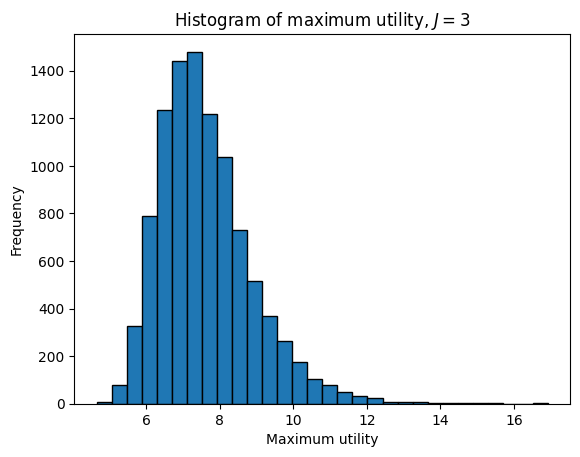

In [5]:
# Simulate the choice process N times
N = 10000

# Create array with draws for epsilon
eps = np.random.gumbel(size=(N, J))

# Allocate the memory for the maximum utility
maxU_J3 = np.zeros(N)

# Simulate the choice process N times
for draw in range(N):
    
    # Compute the total utilities of the alternatives
    U1 = df.loc["V","Alt1"] + eps[draw, 0]
    U2 = df.loc["V","Alt2"] + eps[draw, 1]
    U3 = df.loc["V","Alt3"] + eps[draw, 2]

    # Determine the maximum utility derived from the choice set
    maxU_J3[draw] = max(U1, U2, U3)

# Plot the histogram of the maximum utility 
plt.hist(maxU_J3, bins=30, edgecolor="black")
plt.xlabel("Maximum utility")
plt.ylabel("Frequency")
plt.title(f"Histogram of maximum utility, $J = ${J}")
plt.show()

The expected maximum utility for a decision maker $n$, $\mathbb{E}[\max U_n] $, is simply the expected value of the maximum utility of the alternatives.<br> 
In other words, the expected maximum utility is the mean of the maximum utilities across all realisations of $\varepsilon$.

In [6]:
Expected_maxU_J3 = np.mean(maxU_J3)
print(f"The expected maximum utility decision maker n derives from his choice set is: {Expected_maxU_J3:0.3f}")

The expected maximum utility decision maker n derives from his choice set is: 7.620


`--> A couple of observations can be made:`<br>

`1. The expected maximum utility (7.62) is higher than the highest of the observed utilities (6.53)`<br>

`2. The shape of the distribution of the expected maximum utility is asymmetric, and looks Extreme Value Type I-shaped`<br>


### 4. Effect of the number of alternatives on the expected maximum utility
The expected maximum utility can be expected to increase with the number of alternatives in the choice set ($J$). The intuition is that as the decision maker can choose from more alternatives, it gets more likely that a very attractive alternative is among them. In practice, this means that if the decision-maker visits a superstore (with many more alternatives), he is more likely to find an alternative which he really likes. <br>
Let's explore this relationship between the expected maximum utility and the choice set size by simulating the expected maximum utility for $J = 9$ alternatives, and compare it with the $J = 3$ case.

In [7]:
# First we need to add alternatives 4 to 9 to the dataframe

# Define the number of alternatives
J = 9

# Define possible levels for variation
brands = ["Samsung", "Apple", "OPPO", ]
sizes = [5.8, 6.0, 6.2, 6.4, 6.6,]
storages = [64, 128, 256, 512]
cameras = ["Average","Good", "Excellent"]
costs = [650, 700, 750, 800, 850, 900]

# Create random data for Alt4 to Alt9 (using simple random enumeration)
for i in range(4, J+1):
    alt = f"Alt{i}"
    brand = np.random.choice(brands)
    size = np.random.choice(sizes)
    storage = np.random.choice(storages)
    camera = np.random.choice(cameras)
    cost = np.random.choice(costs)

    # Add the data to the dictionary
    data[alt] = [brand, size, storage, camera, cost]

# Convert to dataframe
df = pd.DataFrame(data, index=["Brand", "Size", "Storage", "Cam", "Cost"])

# Recode the camera quality to numerical values
df.loc["Cam", :] = df.loc["Cam", :].map(cam_codes)

# Display the dataframe
df

,Alt1,Alt2,Alt3,Alt4,Alt5,Alt6,Alt7,Alt8,Alt9
Brand,Samsung,Apple,OPPO,Samsung,Samsung,Apple,Samsung,OPPO,Samsung
Size,6.0,6.4,6.4,6.6,5.8,5.8,6.0,6.0,5.8
Storage,128,128,256,512,256,256,64,64,64
Cam,1,2,1,0,2,2,1,0,2
Cost,700,850,650,850,750,650,700,750,700


In [8]:
# Compute the observed utilities of the alternatives
for i in range(1, 10):
    if df.loc["Brand", f"Alt{i}"] == "Samsung":
        V = beta_sams + np.dot(beta, df.loc[attribute, f"Alt{i}"])
    elif df.loc["Brand", f"Alt{i}"] == "Apple":
        V = beta_appl + np.dot(beta, df.loc[attribute, f"Alt{i}"])
    elif df.loc["Brand", f"Alt{i}"] == "OPPO":
        V = beta_oppo + np.dot(beta, df.loc[attribute, f"Alt{i}"])

    # Add the utility to the dataframe    
    df.loc["V", f"Alt{i}"] = V

# Show the dataframe
df

,Alt1,Alt2,Alt3,Alt4,Alt5,Alt6,Alt7,Alt8,Alt9
Brand,Samsung,Apple,OPPO,Samsung,Samsung,Apple,Samsung,OPPO,Samsung
Size,6.0,6.4,6.4,6.6,5.8,5.8,6.0,6.0,5.8
Storage,128,128,256,512,256,256,64,64,64
Cam,1,2,1,0,2,2,1,0,2
Cost,700,850,650,850,750,650,700,750,700
V,5.64,5.19,6.53,6.31,5.53,7.33,5.32,2.57,5.32


Let's simulate again the maximum utility.

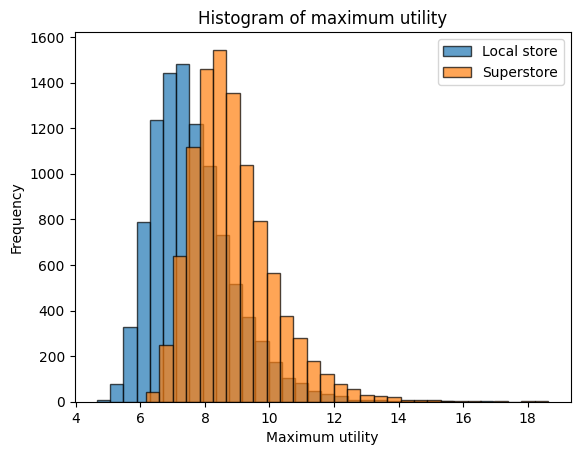

In [9]:
# Simulate the choice process N times
N = 10000

# Create array with draws for epsilon
eps = np.random.gumbel(size=(N, J))

# Allocate the memory for the maximum utility
maxU_J9 = np.zeros(N)

# Simulate the choice process N times
for draw in range(N):
    
    # Compute the total utilities of the alternatives
    U1 = df.loc["V","Alt1"] + eps[draw, 0]
    U2 = df.loc["V","Alt2"] + eps[draw, 1]
    U3 = df.loc["V","Alt3"] + eps[draw, 2]
    U4 = df.loc["V","Alt4"] + eps[draw, 3]
    U5 = df.loc["V","Alt5"] + eps[draw, 4]
    U6 = df.loc["V","Alt6"] + eps[draw, 5]
    U7 = df.loc["V","Alt7"] + eps[draw, 6]
    U8 = df.loc["V","Alt8"] + eps[draw, 7]
    U9 = df.loc["V","Alt9"] + eps[draw, 8]
    
    # Determine the maximum utility derived from the choice set
    maxU_J9[draw] = max(U1, U2, U3, U4, U5, U6, U7, U8, U9)

# Plot the histogram of the maximum utility 
plt.hist(maxU_J3, bins=30, edgecolor="black", label="Local store", alpha=0.7)
plt.hist(maxU_J9, bins=30, edgecolor="black", label="Superstore", alpha=0.7)
plt.xlabel("Maximum utility")
plt.ylabel("Frequency")
plt.title("Histogram of maximum utility")
plt.legend()
plt.show()

Finally, we compute the **expected** maximum utility based on the 9 alternatives.

In [10]:
Expected_maxU_J9 = np.mean(maxU_J9)
print(f"The expected maximum utility decision maker n derives from his choice set is: {Expected_maxU_J9:0.3f}")

The expected maximum utility decision maker n derives from his choice set is: 8.858


`--> Based on these analyses, we can conclude that the expected maximum utility increases by adding alternatives to the choice set.`





### 5. The LogSum

The expected maximum utility for the RUM-MNL model can also be computed analytically.  The formula to do this is called the **"LogSum"**. This formual allows us to compute the expected maximum utility without simulating the maximum utility. 
The LogSum is defined as follows:<br><br>
$\mathbb{E}[\max_i U_n] = \log \left( \sum_i \exp(V_{in}) \right) + \gamma $
    
where:<br>
- $\gamma$ is the Euler-Mascheroni constant (0.5772) (`np.euler_gamma`)

Note that the LogSum is ('coincidentally') equal to the denumerator of the MNL probability formula.

Let's compute the LogSum for the 3 alternatives, and compare it with the simulated expected maximum utility.

In [13]:
LogSum_J3 = np.log(np.exp(df.loc["V","Alt1"]) + np.exp(df.loc["V","Alt2"]) + np.exp(df.loc["V","Alt3"])) + np.euler_gamma
print(f"The logsum for J = 3 is: {LogSum_J3:0.3f}, which is very close to the expected maximum utility we obtained using simulation: {Expected_maxU_J3:0.3f}") 

The logsum for J = 3 is: 7.622, which is very close to the expected maximum utility we obtained using simulation: 7.620


Let's also compute the LogSum for the 9 alternatives, and compare it with the simulated expected maximum utility.

In [14]:
# Compute the sum of the exponents for J = 9
expV_J9  = 0
for i in range(1, J+1):
    expV_J9 = expV_J9 + np.exp(df.loc["V", f"Alt{i}"])

# Take the log of the sum of the exponentiated utilities and add Euler's number
LogSum_J9 = np.log(expV_J9) + np.euler_gamma

# Print the result
print(f"The LogSum for J = 3 is: {LogSum_J9:0.3f}, which is very close to the expected maximum utility we obtained using simulation: {Expected_maxU_J9:0.3f}") 

The LogSum for J = 3 is: 8.845, which is very close to the expected maximum utility we obtained using simulation: 8.858
